## Imports

In [646]:
import pandas as pd
import numpy as np
from psaw import PushshiftAPI
import datetime 
from bs4 import BeautifulSoup 
import requests
import re
import time
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn import svm, datasets
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Enter City (Emphasis on city) where natural disaster occured

In [647]:
searchcity = 'boston'

## Creates a list of URLS to search through

In [648]:
url_list=[]
for page in range(1,20):
    try: url_list.append("https://api.adzuna.com:443/v1/api/jobs/us/search/"+ str(page) +"?app_id=d3330ea8&app_key=cbcbe79274381fae5af07fb6828067ce&results_per_page=100&where="+str(searchcity)+"&sort_direction=up&sort_by=date")
    except:
        pass

## Starts pulling data from Adunza API for jobs

In [649]:
spot = 0
pulleddata = []
for url in url_list:
    pulleddata.append(requests.get(url).json())
    print(str(spot) + ' missisipi')
    spot += 1
    time.sleep(1)

0 missisipi
1 missisipi
2 missisipi
3 missisipi
4 missisipi
5 missisipi
6 missisipi
7 missisipi
8 missisipi
9 missisipi
10 missisipi
11 missisipi
12 missisipi
13 missisipi
14 missisipi
15 missisipi
16 missisipi
17 missisipi
18 missisipi


## Structures data 

In [650]:
structureddata = []
for x in range(0, len(pulleddata)):
    for y in pulleddata[x]['results']:
        structureddata.append(y)

## Creates Dataframe and creates a saved file (in case of "oopsies")

In [651]:
df = pd.DataFrame()
df['company'] =  [structureddata[x]['company']['display_name'] for x in range(0, len(structureddata))]
df['date'] = [structureddata[x]['created'][0:7] for x in range(0, len(structureddata))]
df['title']= [structureddata[x]['title']for x in range(0, len(structureddata))]
df['salary']= [structureddata[x]['salary_is_predicted']for x in range(0, len(structureddata))]
df['sector']= [structureddata[x]['category']['label']for x in range(0, len(structureddata))]

df.drop_duplicates(inplace=True)
df.to_csv('df.csv')

## Null (all should be 0)

In [652]:
df.isnull().sum()

company    0
date       0
title      0
salary     0
sector     0
dtype: int64

## Number of Data Points

In [653]:
len(df)

367

## Frequency of posting by dates (Should be "evenly" distributed)

In [654]:
df['date'].value_counts().head(10)

2018-12    147
2019-01    117
2018-11     46
2018-10     30
2018-09     14
2018-08      8
2018-07      3
2018-05      1
2018-06      1
Name: date, dtype: int64

## Most common Sectors posted

In [655]:
df['sector'].value_counts()

PR, Advertising & Marketing Jobs    84
Retail Jobs                         73
Unknown                             39
Engineering Jobs                    39
Teaching Jobs                       28
Logistics & Warehouse Jobs          20
Healthcare & Nursing Jobs           16
Energy, Oil & Gas Jobs               8
Other/General Jobs                   8
IT Jobs                              8
Admin Jobs                           7
Graduate Jobs                        7
Accounting & Finance Jobs            5
Travel Jobs                          5
Consultancy Jobs                     4
Customer Services Jobs               4
Property Jobs                        3
HR & Recruitment Jobs                3
Sales Jobs                           2
Manufacturing Jobs                   2
Trade & Construction Jobs            1
Legal Jobs                           1
Name: sector, dtype: int64

## Industry Dummyvariable DataFrame

In [656]:
industrygraphs = pd.get_dummies(df['sector'])
industry = pd.concat([df, industrygraphs], axis=1)
for x in industry.columns[5:]:
    print(x)

Accounting & Finance Jobs
Admin Jobs
Consultancy Jobs
Customer Services Jobs
Energy, Oil & Gas Jobs
Engineering Jobs
Graduate Jobs
HR & Recruitment Jobs
Healthcare & Nursing Jobs
IT Jobs
Legal Jobs
Logistics & Warehouse Jobs
Manufacturing Jobs
Other/General Jobs
PR, Advertising & Marketing Jobs
Property Jobs
Retail Jobs
Sales Jobs
Teaching Jobs
Trade & Construction Jobs
Travel Jobs
Unknown


## Frequency of posts 

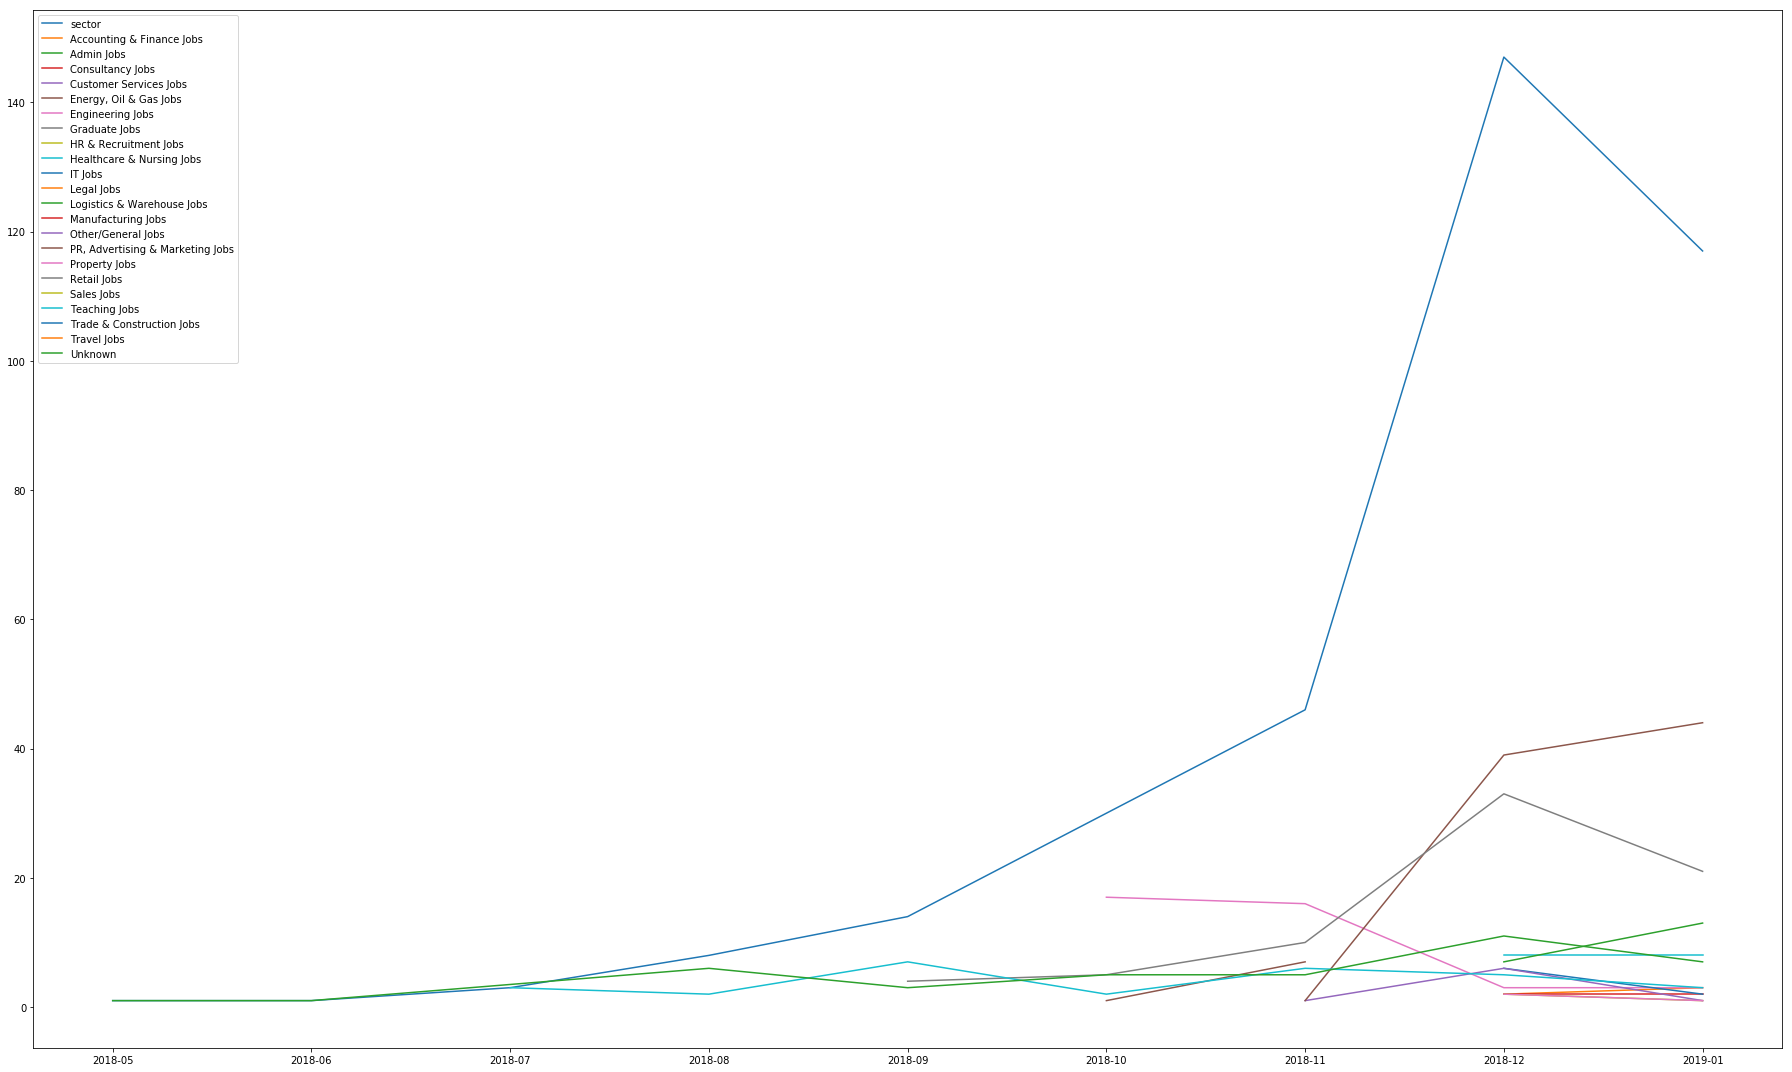

In [659]:
plt.figure(figsize=(25,15))
ax = sns.lineplot(data = df['date'].sort_index().value_counts()) 
for x in industry.columns[5:]:
    sns.lineplot(data = industry[industry[x] == 1]['date'].sort_index().value_counts())
plt.legend(labels=industry.columns[4:])
plt.tight_layout()